Created using GPT-4.

I want to create a Jupyter notebook that visualises the weights of a neural network trained on the MNIST dataset. I would like to train the neural network myself using the PyTorch framework. I want the neural network to have one hidden layer of 15 units. I want to visualise the weights of each feature in the hidden layer as heat maps on the same plot, and the weights going from the last hidden layer to the output layer as a single heat map, with the axis corresponding to the number labeled. Assume I have already installed the necessary libraries.

In [1]:
# Import the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 15)
        self.fc2 = nn.Linear(15, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
model = Net().to(device)

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Load the data
mnist_data = datasets.MNIST(root='./data', train=True, download=True,
                            transform=transforms.ToTensor())
data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64, shuffle=True)

# Training the network
num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in data_loader:
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = loss_function(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

print("Training completed!")

Training completed!


That's great, but the plots that were produced are small because they are all on the same axis. Could you rewrite from "# Plot the weights as heatmaps" and below and put the first heat maps on a a 4x4 plot, and output the second plot separately?

Thanks, on second thought I'd like my heat maps to be comparable to another set created using the code found below. Could you please find the relevant colours and modify the above code to match?

```
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(all_theta[i][1:785].reshape(28, 28), interpolation='nearest',cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Image of the 784 weights for each 10 trained classifiers')
matplot.show()
```

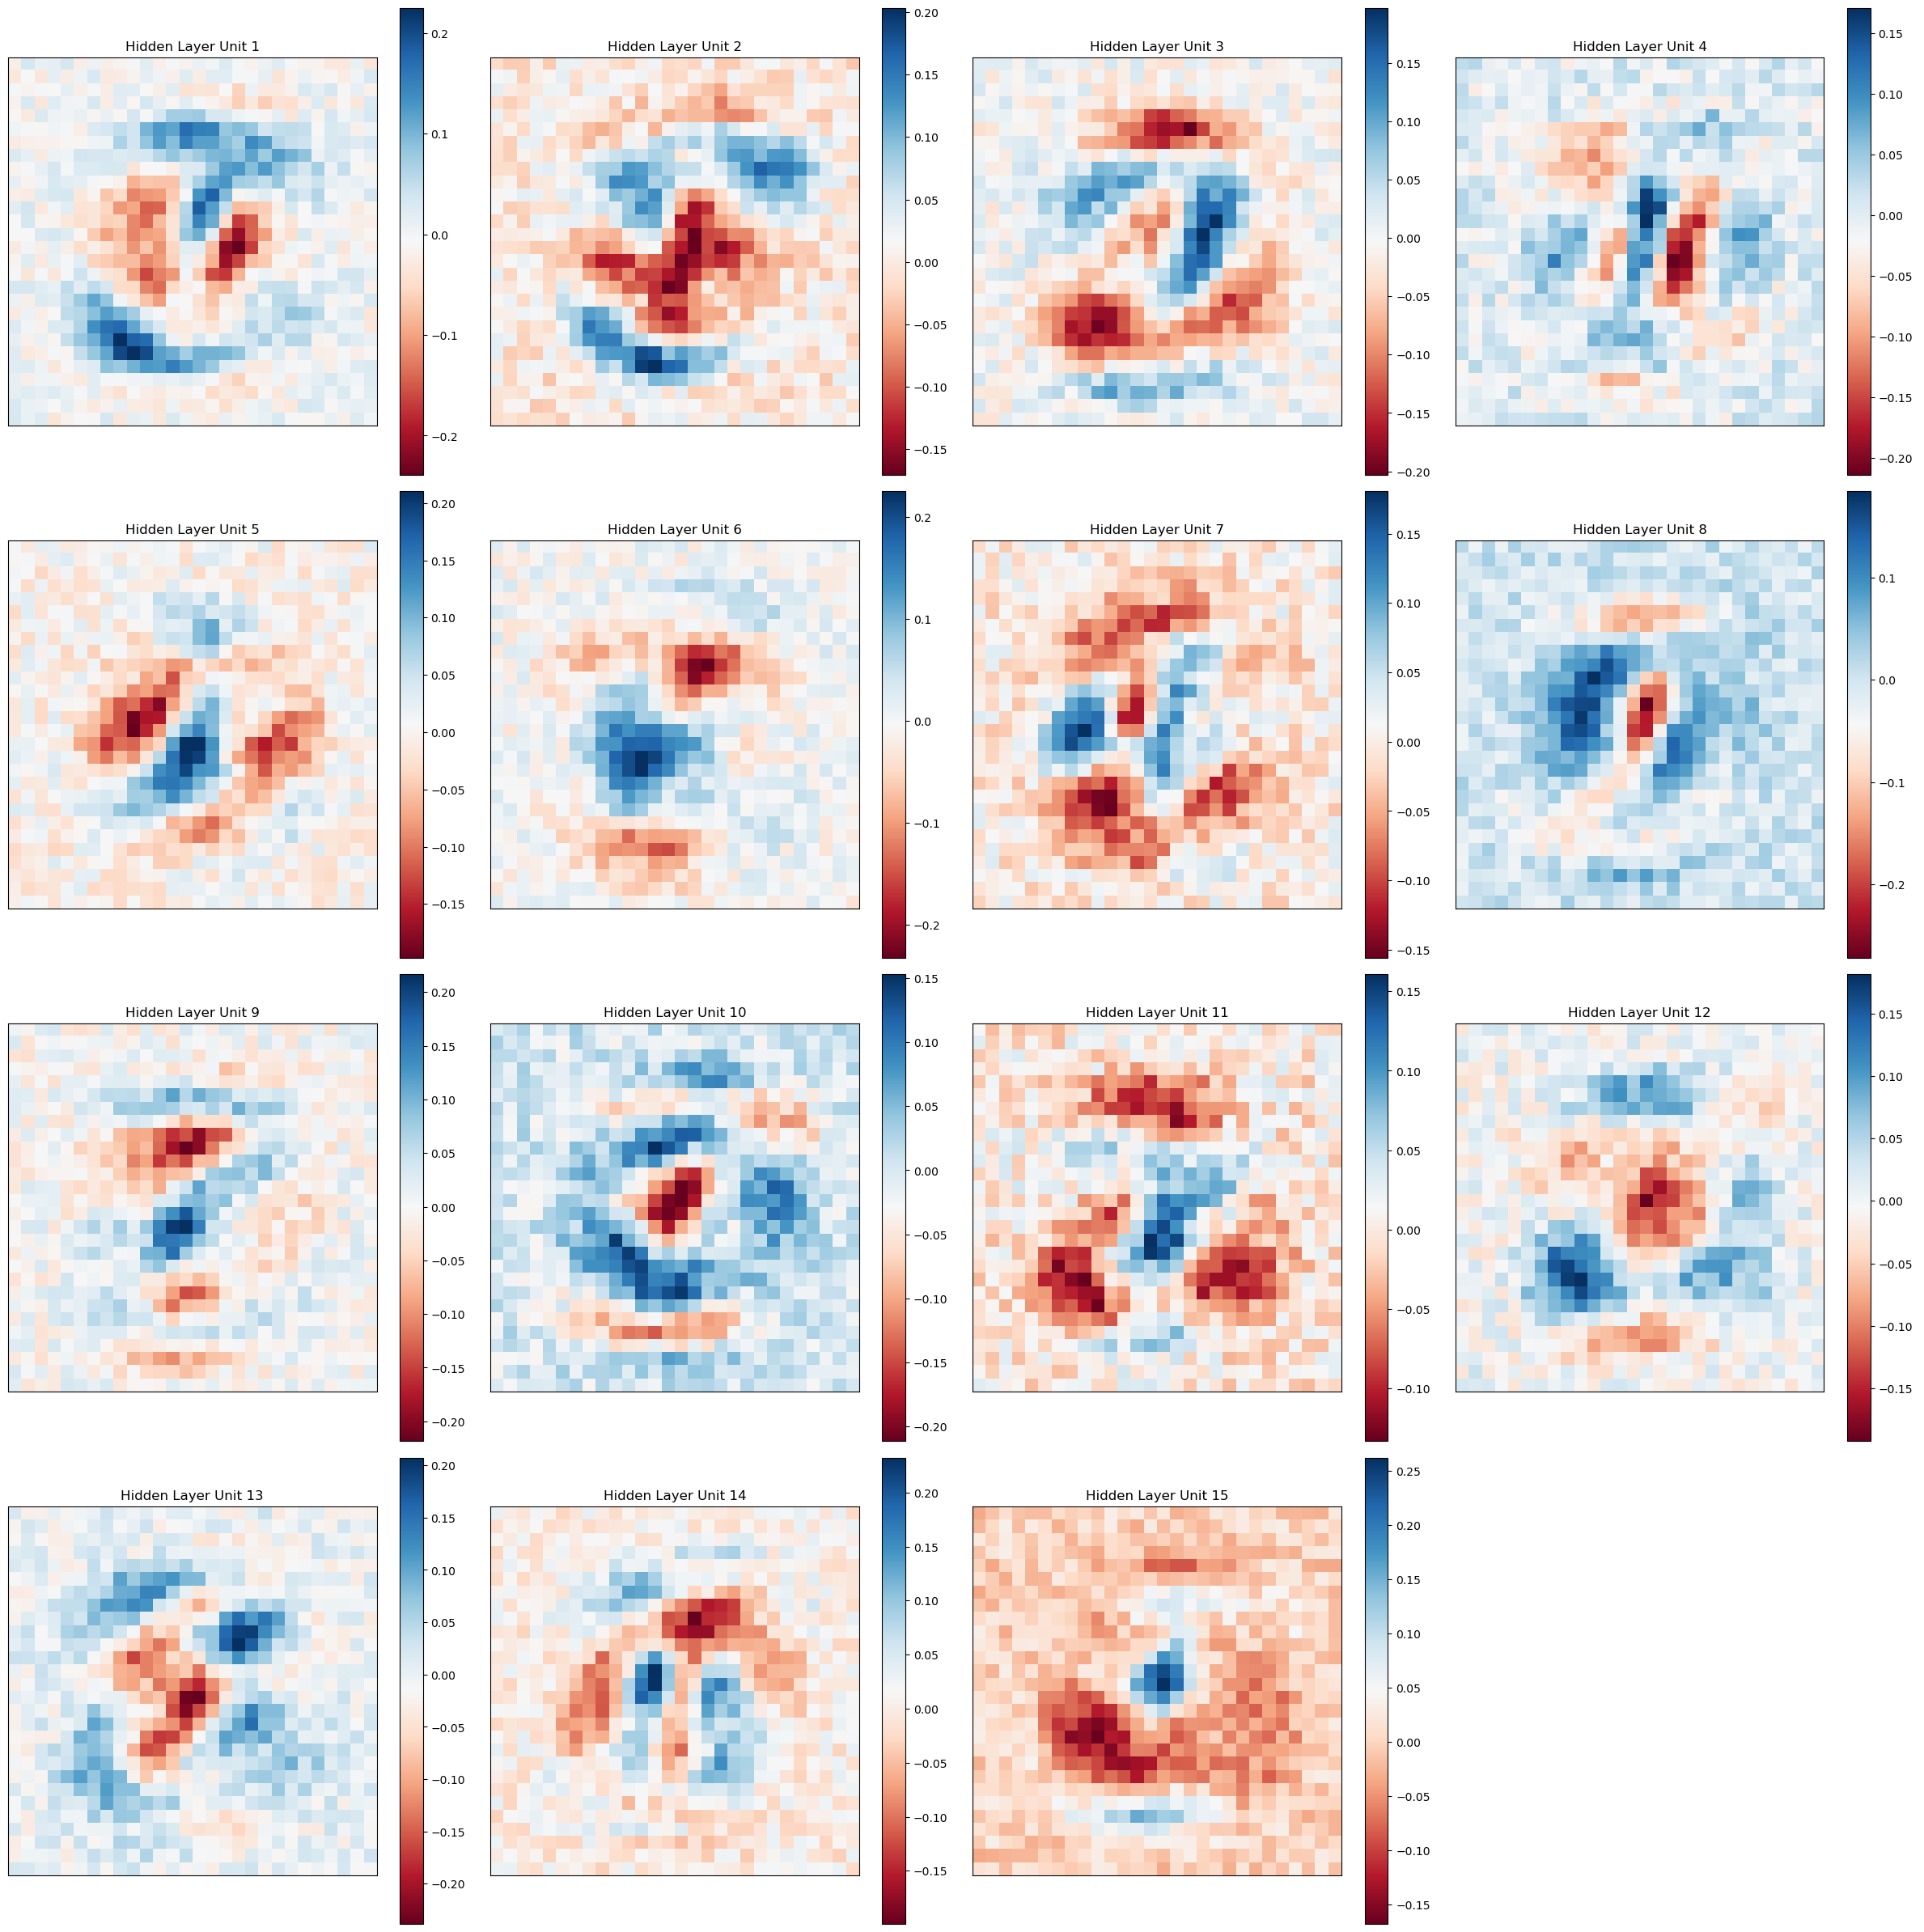

In [3]:
# Visualize the weights
def plot_heatmap(weights, ax, title):
    im = ax.imshow(weights, cmap='RdBu')
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())
    fig.colorbar(im, ax=ax)

# Get the weights
weights1 = model.fc1.weight.data.cpu().numpy()
weights2 = model.fc2.weight.data.cpu().numpy()

# Plot the weights of hidden layer as 4x4 heatmaps
fig, axs = plt.subplots(4, 4, figsize=(24, 24))

for i in range(4):
    for j in range(4):
        if i*4 + j < weights1.shape[0]: # To make sure we don't go out of bounds
            plot_heatmap(weights1[i*4 + j, :].reshape(28, 28), axs[i, j], f"Hidden Layer Unit {i*4 + j+1}")
        else:
            axs[i, j].axis('off') # Turn off the axis for the plots with no data

plt.tight_layout()
plt.show()

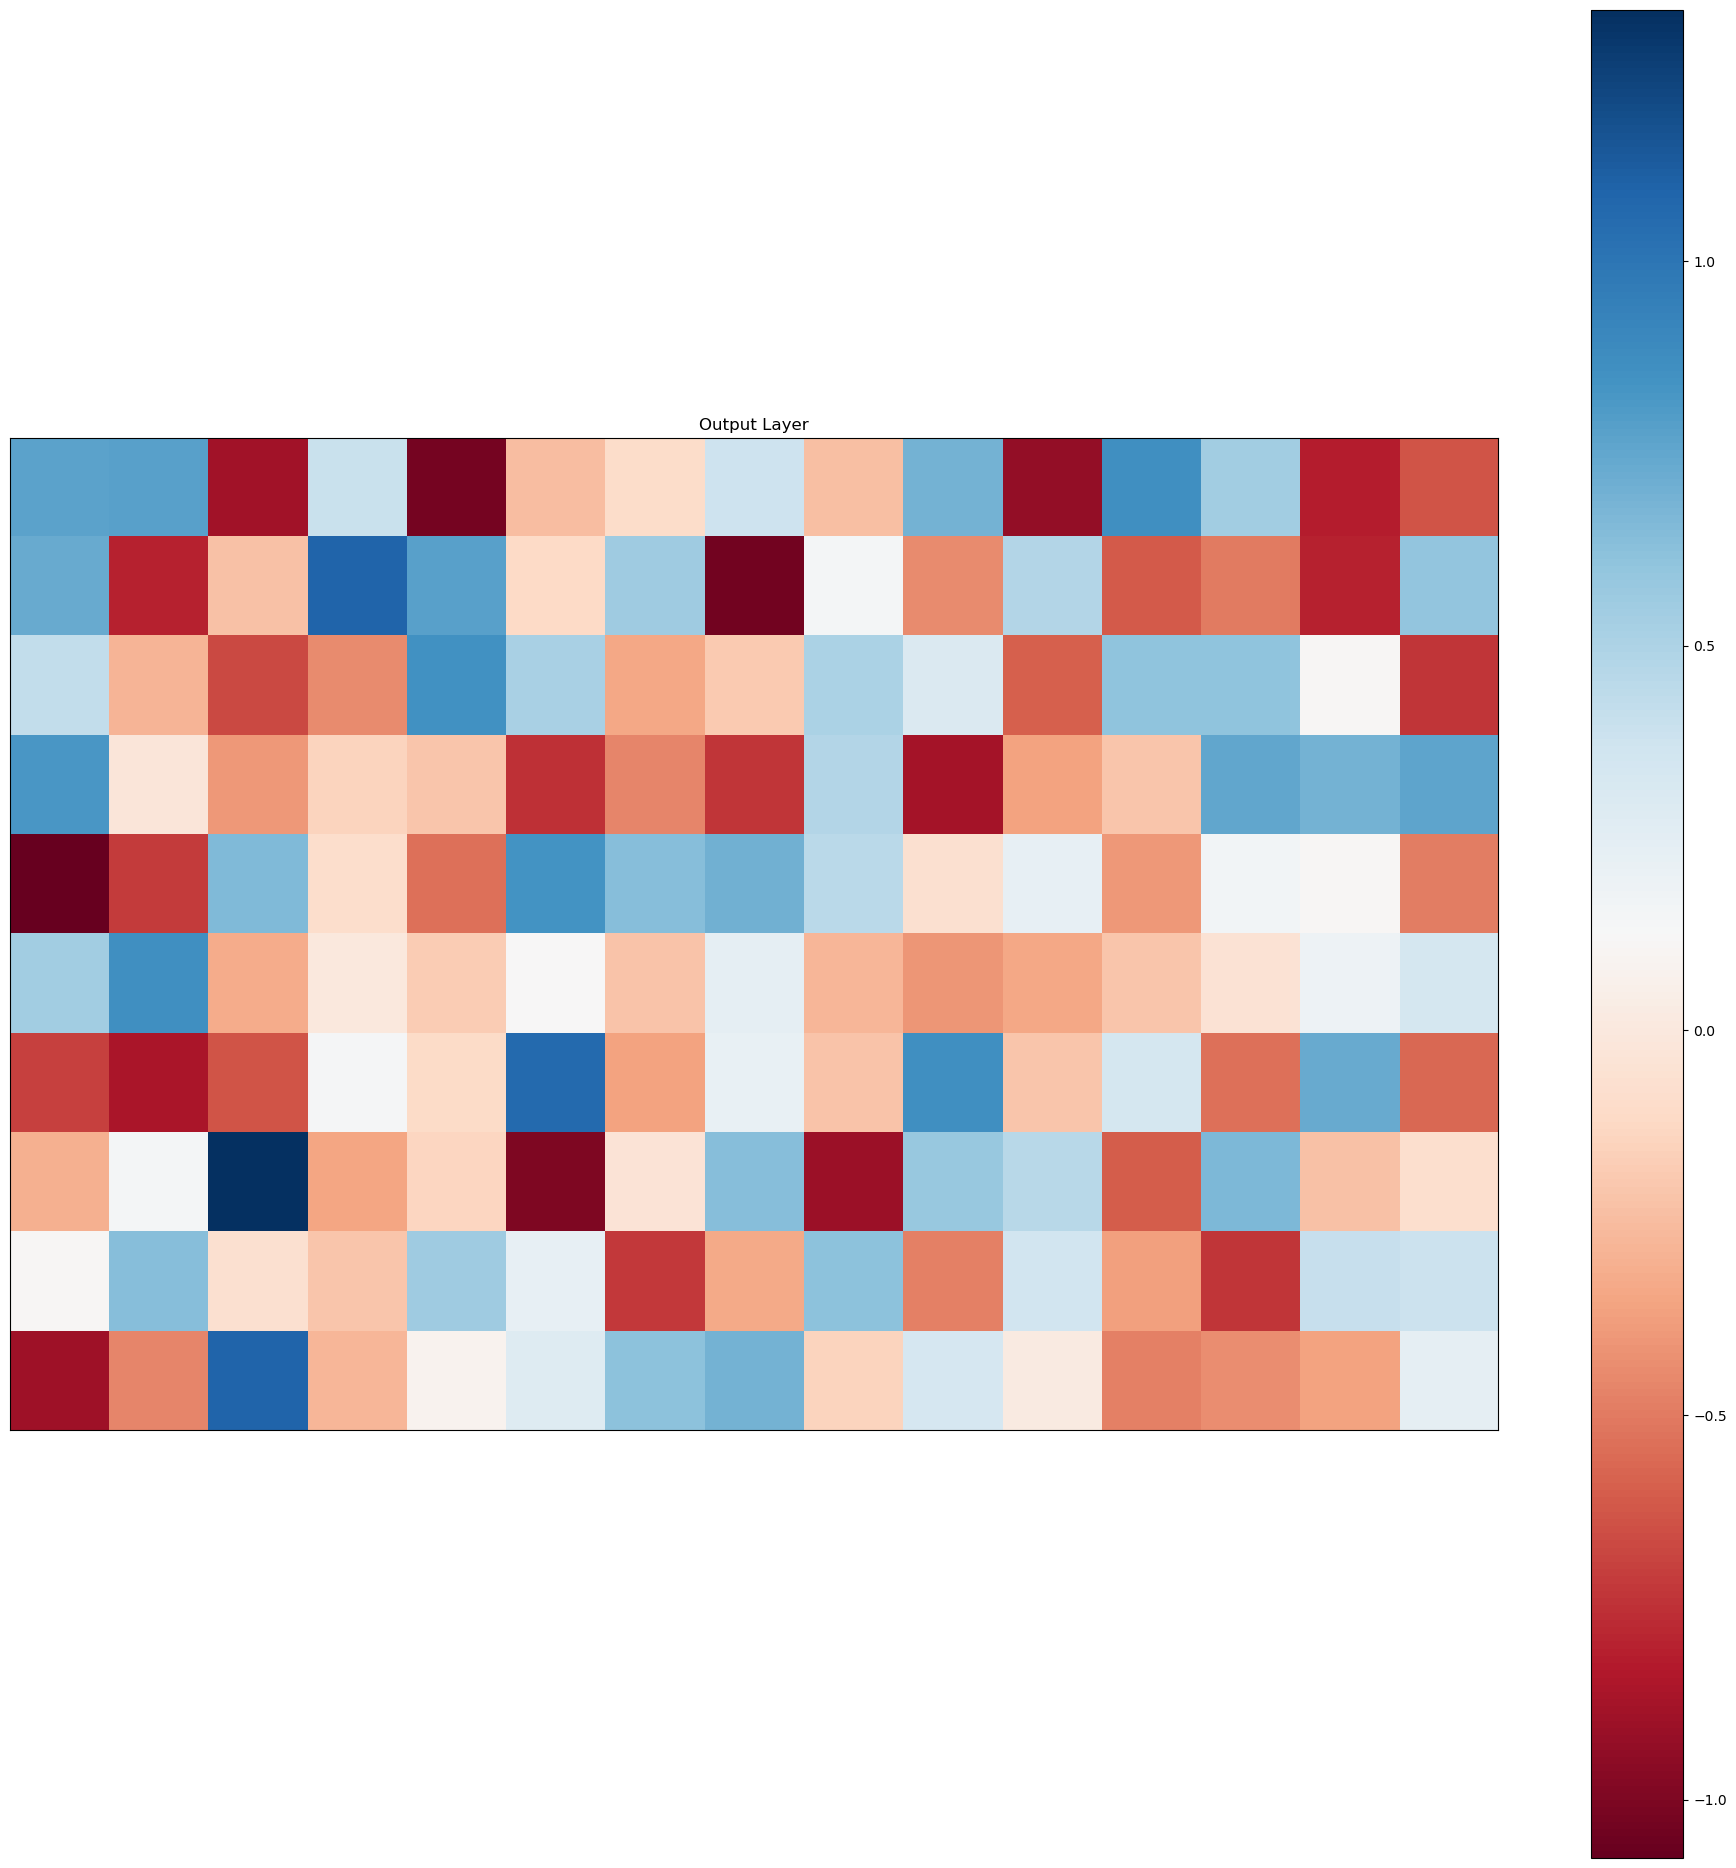

In [4]:
# Plot the weights of output layer separately
fig, ax = plt.subplots(1, 1, figsize=(24, 24))
plot_heatmap(weights2, ax, "Output Layer")
plt.show()